In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

df_tau = pd.read_csv('tau1_tau2.csv',header=None)
df_tau.columns = ['tau1','tau2']
df_ghsom = pd.read_csv('../../entropy_ghsom_scm.txt',header=None,sep=' ')
df_ghsom.columns = ['tau1','tau2','clusters','entropy']
df_ghsom_clean = df_ghsom[['clusters','entropy']]
df_ghsom_map = pd.read_csv('../../ghsom_mapsize.csv')
df_tau

df_ghsom = pd.merge(df_tau,df_ghsom, on=['tau1','tau2'],how='outer') 

In [7]:
df_ghsom

,tau1,tau2,clusters,entropy
0,0.10,0.100,13,1.614968
1,0.10,0.200,13,1.614968
2,0.10,0.300,6,1.524937
3,0.10,0.400,6,1.524937
4,0.10,0.500,6,1.524937
5,0.10,0.600,6,1.524937
6,0.10,0.700,6,1.524937
7,0.10,0.800,6,1.524937
8,0.10,0.900,6,1.524937
9,0.10,0.010,90,3.659686


In [14]:
df_ghsom['map_size'] = df_ghsom_map
df_ghsom = df_ghsom.groupby('clusters').max().reset_index()
# df_ghsom = df_ghsom.sort_values(by=['map_size'])
df_ghsom

,clusters,tau1,tau2,entropy,map_size
0,4,0.90,0.900,0.852619,4
1,6,0.10,0.900,1.524937,6
2,7,0.90,0.200,0.899432,7
3,8,0.08,0.900,1.661650,8
4,10,0.90,0.900,2.015348,10
5,12,0.04,0.900,2.211459,12
6,13,0.90,0.200,2.040957,13
7,16,0.08,0.100,1.685638,19
8,18,0.90,0.900,2.586669,19
9,21,0.90,0.900,2.801272,22


In [15]:
df_kmeans = pd.read_csv('../../entropy_kmeans_scm.txt',header=None,sep=' ')
df_kmeans.columns = ['clusters','entropy']
df_kmeans = df_kmeans[df_kmeans.clusters<=max(df_ghsom.clusters)]
df_kmeans

,clusters,entropy
0,1,0.000000
1,2,0.074371
2,3,0.314258
3,4,0.321444
4,5,0.327748
5,6,0.329093
6,7,0.361135
7,8,0.388252
8,9,0.389899
9,10,0.776107


In [19]:
df_som = pd.read_csv('../../entropy_som_scm.txt',header=None,sep=' ')
df_som.columns =  ['xSize','ySize','tau1','tau2','clusters','entropy']
df_som['map_size']= df_som['xSize']*df_som['ySize']
df_som = df_som[['clusters','entropy','map_size']]
# df_som_map_size = pd.read_csv('../../som_map_size.csv')
# df_som['map_size'] = df_som_map_size

df_som = df_som.groupby('clusters').min().reset_index()
df_som = df_som.sort_values(by=['map_size'])
df_som

,clusters,entropy,map_size
0,6,1.524937,4
1,8,2.049136,8
2,9,2.188628,9
3,10,2.416996,10
4,12,2.634874,12
5,14,2.897955,14
6,15,2.976800,15
7,16,3.071410,16
8,18,3.249401,18
9,20,3.348032,20


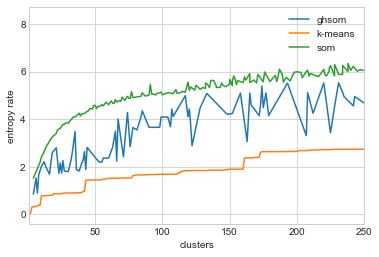

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np


plt.plot(df_ghsom.clusters.tolist(),df_ghsom.entropy.tolist(),label='ghsom')
plt.plot(df_kmeans.clusters.tolist(),df_kmeans.entropy.tolist(),label='k-means')
plt.plot(df_som.map_size.tolist(),df_som.entropy.tolist(),label='som')
plt.xlabel('clusters')
plt.ylabel('entropy rate')
plt.xlim(1,250)
plt.legend();